# Cats-vs-Dogs Convolutional Neural Network

## Preparing data into corresponding directories

In [1]:
import os,shutil

In [2]:
original_dataset_directory = 'datasets/dogs-vs-cats/train'

base_dir = 'datasets/dogs-vs-cats-small'
os.mkdir(base_dir)

In [3]:
train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [4]:
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

test_cats_dir = os.path.join(test_dir,'cats')
test_dogs_dir = os.path.join(test_dir,'dogs')

os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)

os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)

In [5]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_directory,fname)
    dst = os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)

In [6]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_directory,fname)
    dst = os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)

In [7]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_directory,fname)
    dst = os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)

In [8]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_directory,fname)
    dst = os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [9]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_directory,fname)
    dst = os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [10]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_directory,fname)
    dst = os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [11]:
print('Length of training cats images: ',len(os.listdir(train_cats_dir)))
print('Length of training dogs images: ',len(os.listdir(train_dogs_dir)))

print('Length of validation cats images: ',len(os.listdir(validation_cats_dir)))
print('Length of validation dogs images: ',len(os.listdir(validation_dogs_dir)))

print('Length of test cats images: ',len(os.listdir(test_cats_dir)))
print('Length of test dogs images: ',len(os.listdir(test_dogs_dir)))

Length of training cats images:  1000
Length of training dogs images:  1000
Length of validation cats images:  500
Length of validation dogs images:  500
Length of test cats images:  500
Length of test dogs images:  500


## Designing the network architecture

In [16]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential(
    [
        keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (150,150,3)),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64,(3,3),activation = 'relu',input_shape = (150,150,3)),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(128,(3,3),activation = 'relu',input_shape = (150,150,3)),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(512,activation = 'relu'),
        keras.layers.Dense(1,activation = 'sigmoid')
    ]
)

model.compile(
    loss = 'binary_crossentropy',
    optimizer = keras.optimizers.RMSprop(lr = 10**(-4)),
    metrics = ['acc']
)

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            

## Data preprocessing and generating batches

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Training the model

In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch =100,
    epochs = 8,
    validation_data = validation_generator,
    validation_steps = 50
)

Epoch 1/8
100/100 [==============================] - 76s 758ms/step - loss: 0.6875 - acc: 0.5735 - val_loss: 0.6444 - val_acc: 0.6600
Epoch 2/8
100/100 [==============================] - 72s 723ms/step - loss: 0.6163 - acc: 0.6720 - val_loss: 0.5997 - val_acc: 0.6810
Epoch 3/8
100/100 [==============================] - 76s 765ms/step - loss: 0.5486 - acc: 0.7235 - val_loss: 0.6073 - val_acc: 0.6800
Epoch 4/8
100/100 [==============================] - 76s 758ms/step - loss: 0.5065 - acc: 0.7495 - val_loss: 0.5688 - val_acc: 0.7080
Epoch 5/8
100/100 [==============================] - 71s 711ms/step - loss: 0.4624 - acc: 0.7855 - val_loss: 0.6803 - val_acc: 0.6310
Epoch 6/8
100/100 [==============================] - 67s 670ms/step - loss: 0.4237 - acc: 0.8115 - val_loss: 0.5757 - val_acc: 0.7120
Epoch 7/8
100/100 [==============================] - 69s 690ms/step - loss: 0.3900 - acc: 0.8325 - val_loss: 0.5720 - val_acc: 0.7200
Epoch 8/8
100/100 [==============================] - 67s 672ms

In [20]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [23]:
training_loss = history.history['loss']
training_accuracy = history.history['acc']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_acc']

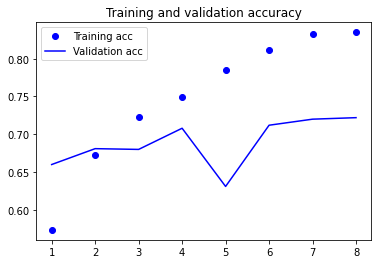

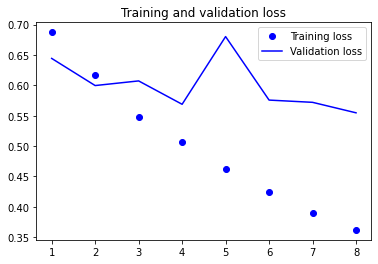

In [24]:
import matplotlib.pyplot as plt

epochs = range(1, len(training_accuracy) + 1)
plt.plot(epochs, training_accuracy, 'bo', label='Training acc')
plt.plot(epochs, validation_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, training_loss, 'bo', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Testing the model